In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [2]:
fouryears = pd.read_pickle("./4years.pkl")
print (fouryears)

        CDateTime SalesPoint  SalesChannelKey         GroupCat ItemSize  \
0      2015-01-01      LWSR                 4       WALL TILES        P   
1      2015-01-01      LWSR                 4      FLOOR TILES        L   
2      2015-01-01      LWSR                 4            GROUT        Q   
3      2015-01-01      LWSR                 4            GROUT        Q   
4      2015-01-01      LWSR                 4            GROUT        Q   
5      2015-01-01      DELUN                2       WALL TILES        V   
6      2015-01-01      FDAMT                5           MORTAR        P   
7      2015-01-01      KDSR                 5      FLOOR TILES        L   
8      2015-01-01      KDSR                 5      FLOOR TILES        M   
9      2015-01-01      FDKEG                5       WALL TILES        R   
10     2015-01-01      CAKAN                1       WALL TILES        G   
11     2015-01-01      CAKAN                1       WALL TILES        D   
12     2015-01-01      LW

In [3]:
WT_data = fouryears.loc[fouryears.GroupCat=='WALL TILES'].reset_index(drop=True)  # Separate floor tiles
print (WT_data)

        CDateTime SalesPoint  SalesChannelKey    GroupCat ItemSize  \
0      2015-01-01      LWSR                 4  WALL TILES        P   
1      2015-01-01      DELUN                2  WALL TILES        V   
2      2015-01-01      FDKEG                5  WALL TILES        R   
3      2015-01-01      CAKAN                1  WALL TILES        G   
4      2015-01-01      CAKAN                1  WALL TILES        D   
5      2015-01-01      LWSR                 4  WALL TILES        R   
6      2015-01-01      LWSR                 4  WALL TILES        R   
7      2015-01-01      DELUN                2  WALL TILES        V   
8      2015-01-01      FDJAF                5  WALL TILES        F   
9      2015-01-01      FDJAF                5  WALL TILES        F   
10     2015-01-01      LWSR                 4  WALL TILES        D   
11     2015-01-01      LWSR                 4  WALL TILES        D   
12     2015-01-01      LWSR                 4  WALL TILES        D   
13     2015-01-01   

In [4]:
del (WT_data['GroupCat'])  # Remove the unwanted column
print (WT_data)

        CDateTime SalesPoint  SalesChannelKey ItemSize  DiscountPcnt   QTY
0      2015-01-01      LWSR                 4        P           0.0     1
1      2015-01-01      DELUN                2        V           0.0  1200
2      2015-01-01      FDKEG                5        R           1.0    80
3      2015-01-01      CAKAN                1        G          50.0     1
4      2015-01-01      CAKAN                1        D           0.0    35
5      2015-01-01      LWSR                 4        R           0.0    84
6      2015-01-01      LWSR                 4        R           0.0    84
7      2015-01-01      DELUN                2        V           0.0   300
8      2015-01-01      FDJAF                5        F           0.0    21
9      2015-01-01      FDJAF                5        F           0.0     1
10     2015-01-01      LWSR                 4        D           6.0   225
11     2015-01-01      LWSR                 4        D           6.0   128
12     2015-01-01      LW

In [5]:
WT_data = WT_data[(WT_data.SalesPoint != 'DELUN')]
WT_data = WT_data[(WT_data.SalesPoint != 'LWSR ')]

In [6]:
x=sorted(WT_data.ItemSize.unique())
print (x)
len(x)

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y', 'p']


20

In [8]:
y=sorted(WT_data.SalesChannelKey.unique())
print (y)
len(y)

[-1, 1, 2, 4, 5, 7]


6

In [6]:
wall_names = WT_data['SalesPoint'].unique().tolist()   # Salaepoints names
print (len(wall_names))

131


In [7]:
wall_names = sorted(wall_names)   # Sort the names
print (wall_names)

['CABLM', 'CADAM', 'CAEHE', 'CAGOG', 'CAKAN', 'CAMAT', 'CAMTG', 'CAPEL', 'CARAP', 'DBALU', 'DBANG', 'DBANU', 'DBBAN', 'DBCO2', 'DBCO3', 'DBCOL', 'DBDAM', 'DBDIG', 'DBGAL', 'DBHAN', 'DBHOR', 'DBJF1', 'DBJF2', 'DBKEG', 'DBKIR', 'DBKUR', 'DBMAT', 'DBMHI', 'DBMTU', 'DBNAR', 'DBNAW', 'DBNEG', 'DBNUG', 'DBPER', 'DBPIL', 'DBRAP', 'DBRAT', 'DBSAM', 'DBTHI', 'DBVAU', 'DBVAV', 'DBWEN', 'FDALU', 'FDAMB', 'FDAMP', 'FDAMT', 'FDAVI', 'FDAVS', 'FDBA1', 'FDBA2', 'FDBAD', 'FDBAL', 'FDBDU', 'FDCHI', 'FDCHW', 'FDDAM', 'FDEMB', 'FDGAL', 'FDGAM', 'FDGAP', 'FDHOR', 'FDHRN', 'FDJAF', 'FDJEL', 'FDKAD', 'FDKAL', 'FDKAN', 'FDKDW', 'FDKEG', 'FDKLT', 'FDKOT', 'FDKUR', 'FDMAT', 'FDMHI', 'FDMIN', 'FDMON', 'FDMOT', 'FDMTL', 'FDMTU', 'FDNEG', 'FDNIT', 'FDPER', 'FDPND', 'FDRAT', 'FDVAV', 'FDWAP', 'FDWAR', 'FDWAT', 'FDWEL', 'FDWEN', 'JWSR ', 'KDSR ', 'LPABE', 'LPAKW', 'LPALU', 'LPAS1', 'LPCGW', 'LPH11', 'LPH21', 'LPJAH', 'LPLAS', 'LPLTW', 'LPMDW', 'LPMEW', 'LPMH3', 'LPMTW', 'LPNAW', 'LPNEW', 'LPNKC', 'LPNWC', 'LPORI', 

In [8]:
wall_datas = {}
for i, g in WT_data.groupby('SalesPoint'):
    wall_datas.update({'wall_' + str(i) : g.reset_index(drop=True)})  # Create dataframes for each salespoint inside a dictionary
print ('end')

end


In [12]:
print (wall_datas.keys())

dict_keys(['wall_CABLM', 'wall_CADAM', 'wall_CAEHE', 'wall_CAGOG', 'wall_CAKAN', 'wall_CAMAT', 'wall_CAMTG', 'wall_CAPEL', 'wall_CARAP', 'wall_DBALU', 'wall_DBANG', 'wall_DBANU', 'wall_DBBAN', 'wall_DBCO2', 'wall_DBCO3', 'wall_DBCOL', 'wall_DBDAM', 'wall_DBDIG', 'wall_DBGAL', 'wall_DBHAN', 'wall_DBHOR', 'wall_DBJF1', 'wall_DBJF2', 'wall_DBKEG', 'wall_DBKIR', 'wall_DBKUR', 'wall_DBMAT', 'wall_DBMHI', 'wall_DBMTU', 'wall_DBNAR', 'wall_DBNAW', 'wall_DBNEG', 'wall_DBNUG', 'wall_DBPER', 'wall_DBPIL', 'wall_DBRAP', 'wall_DBRAT', 'wall_DBSAM', 'wall_DBTHI', 'wall_DBVAU', 'wall_DBVAV', 'wall_DBWEN', 'wall_FDALU', 'wall_FDAMB', 'wall_FDAMP', 'wall_FDAMT', 'wall_FDAVI', 'wall_FDAVS', 'wall_FDBA1', 'wall_FDBA2', 'wall_FDBAD', 'wall_FDBAL', 'wall_FDBDU', 'wall_FDCHI', 'wall_FDCHW', 'wall_FDDAM', 'wall_FDEMB', 'wall_FDGAL', 'wall_FDGAM', 'wall_FDGAP', 'wall_FDHOR', 'wall_FDHRN', 'wall_FDJAF', 'wall_FDJEL', 'wall_FDKAD', 'wall_FDKAL', 'wall_FDKAN', 'wall_FDKDW', 'wall_FDKEG', 'wall_FDKLT', 'wall_FDK

In [9]:
print (len(wall_datas.keys()))

131


In [10]:
from sklearn.ensemble import RandomForestRegressor
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 7
#plt.figure(figsize = (12, 9))
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import numpy as np
import datetime

wallFeature_matrix = pd.DataFrame()
wallLabel_matrix = pd.DataFrame()
wall_sp_num = 0
year_dic = {2015:0, 2016:1, 2017:2, 2018:3, 2019:4}
rem_list = list()
add_list = list()

arr = list()
wall_l = ['A','B','C','D','E','F','G','H','I','K','L','P','Q','R','S','T','V','W','Y']

for sp in wall_datas.keys():
    
    ######### Total sales #########
    
    sales = wall_datas[sp].filter(['CDateTime','QTY'], axis=1)   # extract 2 columns
    sales_aggre = sales.groupby('CDateTime').agg({'QTY':'sum'})  # group per day

    t_index = pd.DatetimeIndex(start='2015-01-01', end='2018-12-31', freq='1D')
    sales_aggre = sales_aggre.reindex(t_index).fillna(0)

    sales_aggre = sales_aggre.QTY.resample('W').sum()       # convert daily to weekly
    sales_aggre = pd.DataFrame(sales_aggre)

    nonzero_weeks = (sales_aggre['QTY'] != 0).sum()  # Check whether salespoint has data of atleast 24 weeks(6 months). If not, remove that salespoint
    if (nonzero_weeks < 24):
        rem_list.append(sp)
        continue
    add_list.append('Is'+sp[5:])
    
    ################################
    
    ###### Weeks to New year ######
    w1 = sales_aggre.index.week
    w2 = list()
    yearNow=2015
    weeks_per_year=53
    newyear_week = datetime.date(2015, 4, 14).isocalendar()[1]  # Find the new year week
    con = True
    
    for i in range(len(w1)):
        if (con):
            x = newyear_week - w1[i]
        else:
            x = newyear_week + (weeks_per_year-w1[i])
            if (w1[i]==weeks_per_year):
                con=True
        if (x==0):
            weeks_per_year = datetime.date(yearNow, 12, 28).isocalendar()[1]
            newyear_week = datetime.date(yearNow+1, 4, 14).isocalendar()[1]
            yearNow += 1
            con=False
        w2.append(x)
    ################################
    
    ###### Weeks to Christmas ######
    w3 = list()
    yearNow=2015
    christmas_week = datetime.date(2015, 12, 25).isocalendar()[1]  # Find the Christmas week
    con = True
    
    for i in range(len(w1)):
        if (con==True):
            y = christmas_week - w1[i]
        else:
            y = christmas_week
            con=True
        if (y==0):
            if (w1[i]<datetime.date(yearNow+1, 1, 1).isocalendar()[1]):
                con=False
            christmas_week = datetime.date(yearNow+1, 12, 25).isocalendar()[1]
            yearNow += 1
        w3.append(y)
    ################################
    
    ################### Feature matrix & Label matrix ##################
    
    ################### Year, Month, Week ####################
    
    wall_features = pd.DataFrame(index=sales_aggre.index)     # wall_features dataframe stores all the features for one salespoint
        
    wall_features['Year'] = pd.Series(sales_aggre.index.year, index=wall_features.index)     # Year
    labelencoder = LabelEncoder()
    wall_features.iloc[:, 0] = labelencoder.fit_transform(wall_features.iloc[:, 0])  # Label encoded the year
     
    df_month = pd.DataFrame(sales_aggre.index.month)                # Month
    onehotencoder = OneHotEncoder(categorical_features = [0])
    array_month = onehotencoder.fit_transform(df_month).toarray()  # One hot encoded the 12 months
    df_month = pd.DataFrame(array_month, columns=['IsJan','IsFeb','IsMar','IsApr','IsMay','IsJun','IsJul','IsAug','IsSep','IsOct','IsNov','IsDec']).astype('int')
    df_month.index = wall_features.index
    wall_features = pd.concat([wall_features, df_month], axis=1)
        
    df_week = pd.DataFrame(sales_aggre.index.week)                       # Week
    onehotencoder1 = OneHotEncoder(categorical_features = [0])
    array_week = onehotencoder.fit_transform(df_week).toarray()  # One hot encoded the 53 weeks
    df_week = pd.DataFrame(array_week, columns=[('Isweek '+str(i)) for i in range(1,54)]).astype('int')
    df_week.index = wall_features.index
    wall_features = pd.concat([wall_features, df_week], axis=1)
    
    ##########################################################
    
    wall_features['WeeksToNewyear'] = w2    
    wall_features['WeeksToChristmas'] = w3
    
    ################ Channel behavior & QTYs ################
    
    subFrame = wall_datas[sp].filter(['CDateTime','SalesChannelKey','ItemSize','QTY'], axis=1)    # extract 4 columns
    weeks = [g for n, g in subFrame.set_index('CDateTime').groupby(pd.Grouper(freq='W'))]    # create weekly dataframes
    start_year = (subFrame['CDateTime'].dt.year).iloc[0]
    start_week_of_year = (subFrame['CDateTime'].dt.week).iloc[0]
    weeks_of_before_years = 0
    
    for i in range(0, year_dic[start_year]):
        weeks_per_year = datetime.date(list(year_dic.keys())[list(year_dic.values()).index(i)], 12, 28).isocalendar()[1]  #list(year_dic.keys())[list(year_dic.values()).index(0)]
        weeks_of_before_years = weeks_of_before_years + weeks_per_year
    start_week = weeks_of_before_years + start_week_of_year
    print (wall_sp_num+1, sp, start_week)
        
    #counts = [[weeks[i]['SalesChannelKey'].value_counts(normalize=True)] for i in range(len(weeks))]     # customer cat. percents for each week
    
    wall_chan = np.zeros((sales_aggre.shape[0], 11))       # matrix for store channel percentages for each week (one salespoint)
    
    wall_keys = ['WallTiles A','WallTiles B','WallTiles C','WallTiles D','WallTiles E','WallTiles F','WallTiles G','WallTiles H','WallTiles I',
                'WallTiles K','WallTiles L','WallTiles P','WallTiles Q','WallTiles R','WallTiles S','WallTiles T',
                'WallTiles V','WallTiles W','WallTiles Y']
    
    wall_dic = dict.fromkeys(wall_keys, None)      # dictionary for store QTY of group categories(labels) for each week (one salespoint)
    for key in wall_keys:
        wall_dic[key] = [0]*len(sales_aggre)    
        
    ############# Channel behavior ##############
    
    for week in range(len(weeks)):
        
        counts = [weeks[week]['SalesChannelKey'].value_counts(normalize=True)]  # Give channel percentages for week 
        countPcnt = counts[0].tolist()  # Percentage values
        cusCat = counts[0].index   # Channel names
        
        for i in range(len(cusCat)):
            wall_chan[start_week-1][int(cusCat[i])+1] = countPcnt[i]      # add percentages to a matrix
            
    ##############################################
            
    ###### QTY for group categories(labels) ######
        
        wall_table = pd.pivot_table(weeks[week], values='QTY', index=['ItemSize'], aggfunc=sum)  # Give total QTY for each wall tile sizes(for week)

        for wall in wall_table.index:
            wall_dic['WallTiles '+wall.upper()][start_week-1] = wall_dic['WallTiles '+wall.upper()][start_week-1] + wall_table.xs((wall))[0] # Store total QTYs in a dictioanary
        
        start_week += 1
    
    wall_labels = pd.DataFrame.from_dict(wall_dic)  # outputs dataframe for salespoint
    '''
    ############
    dfstd=pd.DataFrame(wall_labels.std())
    for i in range(19):
        arr.append(dfstd.values.tolist()[i][0])
    
    plt.plot(wall_l, arr)
    plt.title('Salespoint '+sp[5:])
    plt.xlabel('Wall tile type')
    plt.ylabel('Standard deviation')
    plt.show()
    arr = list()
    ############
    '''
    wallLabel_matrix = pd.concat([wallLabel_matrix, wall_labels])     # matrix for store labels of all salespoints
    
    ##############################################
    
    Sales_channels = ['Other','Other1','Consignment Agent','Distributors','Direct Dealers/Colombo Dealers','Direct Sales','Franchise Dealers',
                      'Lanka Tiles Plus','Projects','Royal Sales','Regional Sales']
    
    for i in range(11):
        wall_features[Sales_channels[i]] = wall_chan[:, i]  # Add channel percentage features
        
    del wall_features[Sales_channels[1]]  # These deleted channels haven't data
    del wall_features[Sales_channels[4]]
    del wall_features[Sales_channels[7]]
    del wall_features[Sales_channels[9]]
    del wall_features[Sales_channels[10]]
    
    ########################################################
    
    ################### Invoice discount ###################
    
    wall_invDiscount = wall_datas[sp].filter(['CDateTime','DiscountPcnt'], axis=1)   # extract date and invoice discount columns
    wall_invDiscount_aggre = wall_invDiscount.groupby('CDateTime').agg({'DiscountPcnt':'mean'})  # Group per day
    
    wall_invDiscount_aggre = wall_invDiscount_aggre.reindex(t_index).fillna(0)
    wall_invDiscount_aggre = wall_invDiscount_aggre.DiscountPcnt.resample('W').mean()       # convert daily to weekly
    
    wall_features['Invoice Discount'] = wall_invDiscount_aggre     # invoice discount
    
    ########################################################

    wall_sales_p = [wall_sp_num] * len(sales_aggre)
    wall_features['Salespoint'] = wall_sales_p      # Add salespoint name as a feature until doing one hot encoding for salespoint names
    
    wall_features['QTY_sum'] = sales_aggre['QTY']  # Total sales for the week

    wallFeature_matrix = pd.concat([wallFeature_matrix, wall_features])    # matrix for store features of all salespoints
    
    wall_sp_num += 1

#del (wallFeature_matrix['Isweek 53'])

1 wall_CABLM 1
2 wall_CADAM 1
3 wall_CAEHE 166
4 wall_CAGOG 1
5 wall_CAKAN 1
6 wall_CAMAT 1
7 wall_CAMTG 154
8 wall_CAPEL 1
9 wall_CARAP 1
10 wall_DBALU 38
11 wall_DBANG 42
12 wall_DBANU 33
13 wall_DBBAN 136
14 wall_DBCOL 42
15 wall_DBDAM 66
16 wall_DBDIG 38
17 wall_DBGAL 26
18 wall_DBHAN 50
19 wall_DBHOR 39
20 wall_DBJF1 29
21 wall_DBJF2 29
22 wall_DBKEG 38
23 wall_DBKIR 29
24 wall_DBKUR 43
25 wall_DBMAT 60
26 wall_DBMHI 44
27 wall_DBMTU 55
28 wall_DBNAR 90
29 wall_DBNEG 37
30 wall_DBNUG 11
31 wall_DBPER 43
32 wall_DBPIL 13
33 wall_DBRAP 80
34 wall_DBSAM 42
35 wall_DBTHI 46
36 wall_DBWEN 63
37 wall_FDALU 1
38 wall_FDAMB 1
39 wall_FDAMP 2
40 wall_FDAMT 1
41 wall_FDAVI 1
42 wall_FDAVS 170
43 wall_FDBA1 1
44 wall_FDBA2 4
45 wall_FDBAL 1
46 wall_FDBDU 27
47 wall_FDCHI 1
48 wall_FDCHW 58
49 wall_FDDAM 1
50 wall_FDEMB 1
51 wall_FDGAL 1
52 wall_FDGAM 1
53 wall_FDGAP 1
54 wall_FDHOR 1
55 wall_FDHRN 161
56 wall_FDJAF 1
57 wall_FDJEL 1
58 wall_FDKAD 1
59 wall_FDKAL 66
60 wall_FDKAN 132
61 wall_

In [33]:
print ([x[2:] for x in add_list])
print (len(add_list))

['CABLM', 'CADAM', 'CAEHE', 'CAGOG', 'CAKAN', 'CAMAT', 'CAMTG', 'CAPEL', 'CARAP', 'DBALU', 'DBANG', 'DBANU', 'DBBAN', 'DBCOL', 'DBDAM', 'DBDIG', 'DBGAL', 'DBHAN', 'DBHOR', 'DBJF1', 'DBJF2', 'DBKEG', 'DBKIR', 'DBKUR', 'DBMAT', 'DBMHI', 'DBMTU', 'DBNAR', 'DBNEG', 'DBNUG', 'DBPER', 'DBPIL', 'DBRAP', 'DBSAM', 'DBTHI', 'DBWEN', 'FDALU', 'FDAMB', 'FDAMP', 'FDAMT', 'FDAVI', 'FDAVS', 'FDBA1', 'FDBA2', 'FDBAL', 'FDBDU', 'FDCHI', 'FDCHW', 'FDDAM', 'FDEMB', 'FDGAL', 'FDGAM', 'FDGAP', 'FDHOR', 'FDHRN', 'FDJAF', 'FDJEL', 'FDKAD', 'FDKAL', 'FDKAN', 'FDKDW', 'FDKEG', 'FDKOT', 'FDKUR', 'FDMAT', 'FDMHI', 'FDMIN', 'FDMON', 'FDMOT', 'FDMTL', 'FDMTU', 'FDNEG', 'FDNIT', 'FDPER', 'FDPND', 'FDRAT', 'FDVAV', 'FDWAP', 'FDWAR', 'FDWAT', 'FDWEL', 'FDWEN', 'JWSR ', 'KDSR ']
84


In [11]:
############### Salespoint columns ###############

walldf_sp = pd.DataFrame(wallFeature_matrix['Salespoint'].values)
onehotencoder2 = OneHotEncoder(categorical_features = [0])
wallarray_sp = onehotencoder2.fit_transform(walldf_sp).toarray()  # One hot encoded the salespoint column
walldf_sp = pd.DataFrame(wallarray_sp, columns=add_list).astype('int')
walldf_sp.index = wallFeature_matrix.index
wallFeature_matrix = pd.concat([wallFeature_matrix, walldf_sp], axis=1)
del wallFeature_matrix['Salespoint']

##################################################

wallLabel_matrix.index = wallFeature_matrix.index
#print (wallFeature_matrix)
#print (wallLabel_matrix)
#print (label_matrix.loc[:, 'ACCESSORIES':'TIMBER - PARQUE'])
#print (label_matrix.loc[:, 'FloorTiles A':'FloorTiles Y'])
#print (label_matrix.loc[:, 'WallTiles A':'WallTiles Y'])

In [21]:
wall_df_old = pd.concat([wallFeature_matrix, wallLabel_matrix], axis=1)
#print (wall_df_old)
#print ((wall_df_old['QTY_sum'] != 0).sum())
wall_df0 = wall_df_old[wall_df_old.QTY_sum != 0]  # Remove the data points which have 0 sales for the week
#print (wall_df0)
del wall_df0['QTY_sum']
wall_df0 = wall_df0.reset_index(drop=True)
wall_df = wall_df0.sample(frac=1).reset_index(drop=True)     # shuffled
#print (wall_df)

In [17]:
print (wall_df['Invoice Discount'].mean())

4.075571871829138


[0.5759161815653924, 1481.6630192023215, 3966.4240838184346, 159.42527433671845, 8383.67195639293, 51.23975006803205]
1.0
[4.101090803712827e-05, 0.10550900941410819, 0.28244848563828484, 0.011352650739636717, 0.5970000681046022, 0.0036487751953309154]


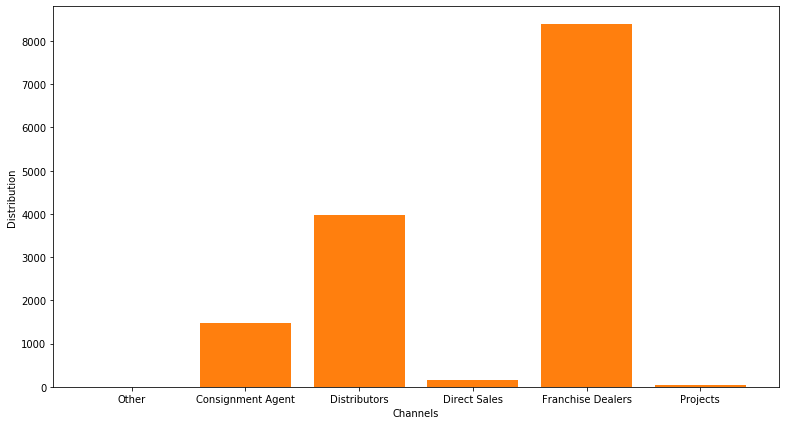

Text(0, 0.5, 'Distribution')

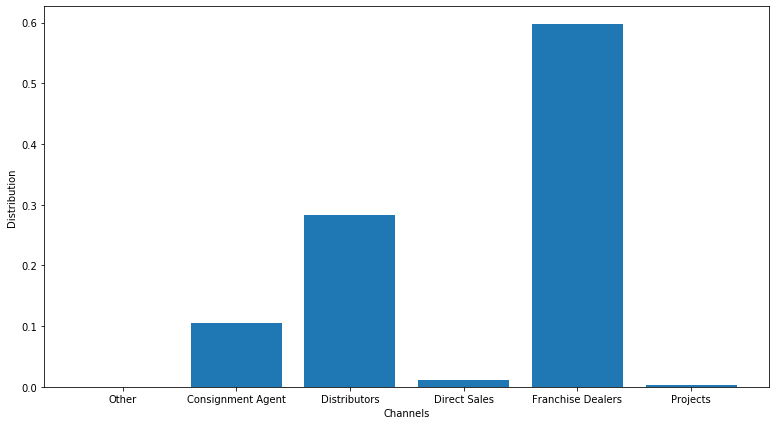

In [18]:
########## Channel distribution ##########
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 13, 7

sales_channels = ['Other','Consignment Agent','Distributors','Direct Sales','Franchise Dealers','Projects']

total = list()
for i in sales_channels:
    total.append(wall_df[i].sum())
    
print (total)
distribution = [x/sum(total) for x in total]
print (sum(distribution))
print (distribution)
plt.bar(sales_channels, distribution)
plt.xlabel('Channels')
plt.ylabel('Distribution')
plt.bar(sales_channels, total)
plt.show()

plt.bar(sales_channels, distribution)
plt.xlabel('Channels')
plt.ylabel('Distribution')
##########################################

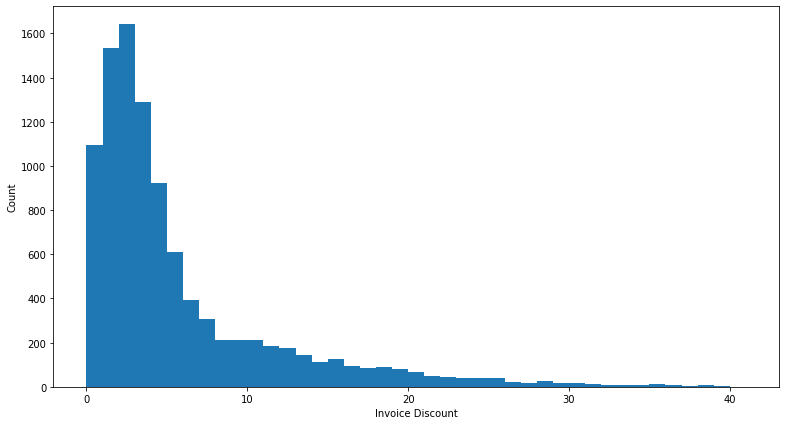

In [20]:
######### Histogram for invoice discount #########
rcParams['figure.figsize'] = 13, 7

di=pd.DataFrame()
di['Discount'] = wall_df['Invoice Discount']
y = di[di.Discount != 0]
x = y['Discount']
plt.hist(x, range=[0,41], bins=41) 
#plt.title(channel) 
plt.xlabel('Invoice Discount') 
plt.ylabel("Count")
plt.show()
###################################################   

In [21]:
print (len(wallFeature_matrix.columns))
print (len(wallLabel_matrix.columns))

160
19


In [22]:
from sklearn.model_selection import train_test_split 

array = wall_df.values
X = array[:,0:159]
y = array[:,159:]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=0)        

In [29]:
################# Random Forest #################

from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 14, 8

rmse_train = list()
rmse_val = list()
#num_of_trees = [10, 20, 50, 75, 100, 150, 200, 250, 300, 400, 500, 750]
#max_features = ['auto', 'sqrt'] 
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]         # Maximum number of levels in tree   
max_depth.append(None)
#max_depth = [10,20,30,40,50,None]
#min_samples_split = [2, 3, 4, 5, 10]
#min_samples_leaf = [1, 2, 4] 
#bootstrap = [True, False]

for x in max_depth:
    regressor = RandomForestRegressor(n_estimators=200, max_features='sqrt', max_depth=x)
    regressor.fit(X_train, y_train)

    y_pred_train = regressor.predict(X_train)
    y_pred_val = regressor.predict(X_val)

    print ('max_depth: '+str(x))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))
    rmse_train.append(np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))

    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_val, y_pred_val)))
    rmse_val.append(np.sqrt(metrics.mean_squared_error(y_val, y_pred_val)))
    print (rmse_train)
    print (rmse_val)
    print ('\n')

'''
dic_train = {'Actual':y_train[1000:1101,3], 'Predicted':y_pred_train[1000:1101,3]}
dic_val = {'Actual':y_val[1000:1101,3], 'Predicted':y_pred_val[1000:1101,3]}

df_train = pd.DataFrame(dic_train)
df_val = pd.DataFrame(dic_val)

plt.plot(df_train['Actual'], label='Actual')
plt.plot(df_train['Predicted'], color='red', label='Predicted')
plt.title('Training Set')
plt.xlabel('data points')
plt.ylabel('Actual and Predicted')
plt.legend()
plt.show()

plt.plot(df_val['Actual'], label='Actual')
plt.plot(df_val['Predicted'], color='red', label='Predicted')
plt.title('Validation Set')
plt.xlabel('data points')
plt.ylabel('Actual and Predicted')
plt.legend()
plt.show()
'''
'''
df_RF = pd.DataFrame({'No of trees':num_of_trees, 'RMSE_train':rmse_train, 'RMSE_val':rmse_val})
df_RF = df_RF.set_index('No of trees')
plt.plot(df_RF['RMSE_train'], label='RMSE_train')
plt.plot(df_RF['RMSE_val'], color='red', label='RMSE_val')
plt.title('RMSE')
plt.xlabel('No. of trees')
plt.ylabel('RMSE')
plt.legend()
plt.show()
'''
#################################################

max_depth: 10
Root Mean Squared Error: 1053.7734259436309
Root Mean Squared Error: 1239.9388827514465
[1053.7734259436309]
[1239.9388827514465]


max_depth: 20
Root Mean Squared Error: 727.0504883439189
Root Mean Squared Error: 1200.3614813034899
[1053.7734259436309, 727.0504883439189]
[1239.9388827514465, 1200.3614813034899]


max_depth: 30
Root Mean Squared Error: 606.0512012807353
Root Mean Squared Error: 1187.5173921589687
[1053.7734259436309, 727.0504883439189, 606.0512012807353]
[1239.9388827514465, 1200.3614813034899, 1187.5173921589687]


max_depth: 40
Root Mean Squared Error: 554.8128201682878
Root Mean Squared Error: 1181.1269882653562
[1053.7734259436309, 727.0504883439189, 606.0512012807353, 554.8128201682878]
[1239.9388827514465, 1200.3614813034899, 1187.5173921589687, 1181.1269882653562]


max_depth: 50
Root Mean Squared Error: 540.1427310047201
Root Mean Squared Error: 1191.229159855634
[1053.7734259436309, 727.0504883439189, 606.0512012807353, 554.8128201682878, 540.142

"\ndf_RF = pd.DataFrame({'No of trees':num_of_trees, 'RMSE_train':rmse_train, 'RMSE_val':rmse_val})\ndf_RF = df_RF.set_index('No of trees')\nplt.plot(df_RF['RMSE_train'], label='RMSE_train')\nplt.plot(df_RF['RMSE_val'], color='red', label='RMSE_val')\nplt.title('RMSE')\nplt.xlabel('No. of trees')\nplt.ylabel('RMSE')\nplt.legend()\nplt.show()\n"

Training set RMSE: 659.0895659508634
Validation set RMSE: 621.1531327541176


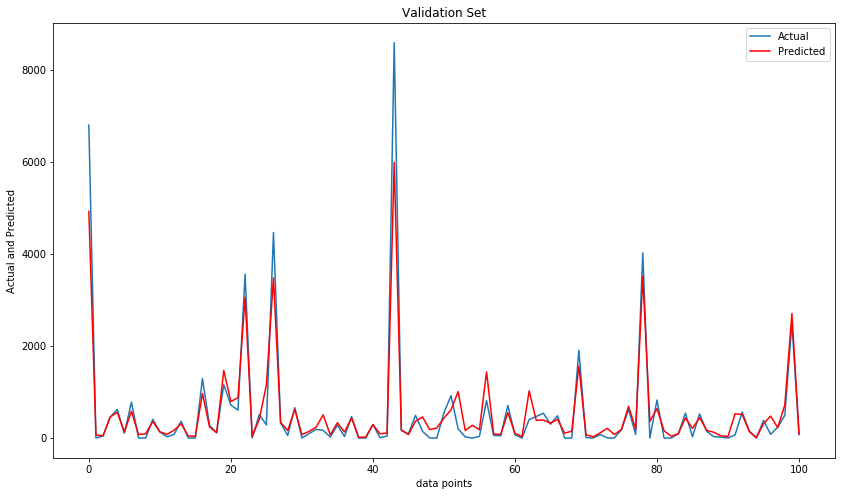

In [24]:
######## Save the selected model as a pickle file ########
from sklearn import metrics
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 14, 8
from sklearn.ensemble import RandomForestRegressor
from sklearn.externals import joblib 
  
#regressor = RandomForestRegressor(n_estimators=200, max_features='sqrt', max_depth=60)
#regressor.fit(X_train, y_train)
    
# Save the model as a pickle in a file 
#joblib.dump(regressor, 'C:/Users/ChamithM/Desktop/Bestmodels/Walltiles_RFmodel_4years.pkl')  
  
# Load the model from the file 
RandomForest = joblib.load('C:/Users/ChamithM/Desktop/Bestmodels/Walltiles_RFmodel_4years.pkl')
  
# Use the loaded model to make predictions 
y_pred_train = RandomForest.predict(X_train)
y_pred_val = RandomForest.predict(X_val)

print('Training set RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))
print('Validation set RMSE:', np.sqrt(metrics.mean_squared_error(y_val, y_pred_val)))

#dic_train = {'Actual':y_train[1000:1101,0], 'Predicted':y_pred_train[1000:1101,0]}
dic_val = {'Actual':y_val[400:501,0], 'Predicted':y_pred_val[400:501,0]}

#df_train = pd.DataFrame(dic_train)
df_val = pd.DataFrame(dic_val)

#df_val = df_val.drop([33])
#df_val = df_val.drop([95])

plt.plot(df_val['Actual'], label='Actual')
plt.plot(df_val['Predicted'], color='red', label='Predicted')
plt.title('Validation Set')
plt.xlabel('data points')
plt.ylabel('Actual and Predicted')
plt.legend()
plt.show()
##########################################################